# 03_feature_engineering - Simple Feature Creation

This notebook applies simple feature engineering: log-transform of amount, extract hour/weekday from timestamps (if present), and compute simple per-account aggregates (total incoming/outgoing, counts). Each operation is placed in its own cell for clarity.

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..','src')))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engineering import apply_feature_engineering

RAW = os.path.abspath(os.path.join('..','data','raw'))
PROCESSED = os.path.abspath(os.path.join('..','data','processed'))

csvs = [f for f in os.listdir(PROCESSED) if f.lower().endswith('.csv')] if os.path.exists(PROCESSED) else []
print('Processed CSVs found:', csvs)


C:\Users\mazen\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


Processed CSVs found: ['cleaned.csv']


In [2]:
# Load cleaned data if available, otherwise load first raw CSV
cleaned_path = os.path.join(PROCESSED, 'cleaned.csv')
if os.path.exists(cleaned_path):
    df = pd.read_csv(cleaned_path)
    print('Loaded cleaned:', cleaned_path)
else:
    raw_csvs = [f for f in os.listdir(RAW) if f.lower().endswith('.csv')] if os.path.exists(RAW) else []
    if not raw_csvs:
        print('No CSVs found in data/raw. Please add dataset.')
    else:
        df = pd.read_csv(os.path.join(RAW, raw_csvs[0]))
        print('Loaded raw:', raw_csvs[0])


Loaded cleaned: c:\Users\mazen\Desktop\Uni\Term 9\Data Mining\Anti-Money Laundering (AML) Detection System\aml_project\data\processed\cleaned.csv


In [3]:
# Show first rows
try:
    display(df.head())
except NameError:
    print('No dataframe loaded.')


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,False,False,False,True,False


In [4]:
# Apply feature engineering and save features
from feature_engineering import apply_feature_engineering, save_features

print('Before shape:', df.shape)
features = apply_feature_engineering(df, save_path=os.path.join(PROCESSED,'features.csv'))
print('After shape:', features.shape)


Before shape: (6362620, 15)
After shape: (6362620, 21)


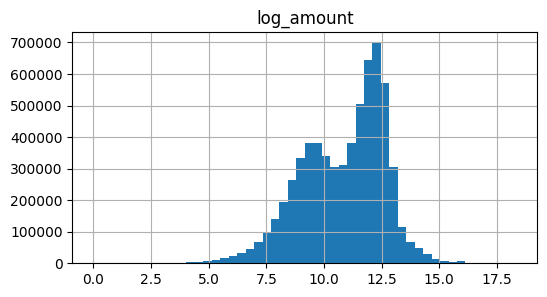

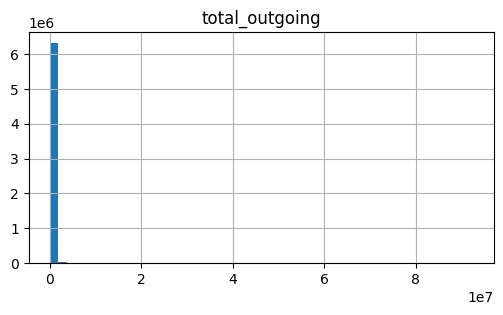

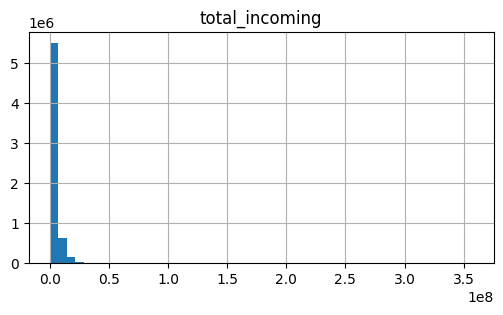

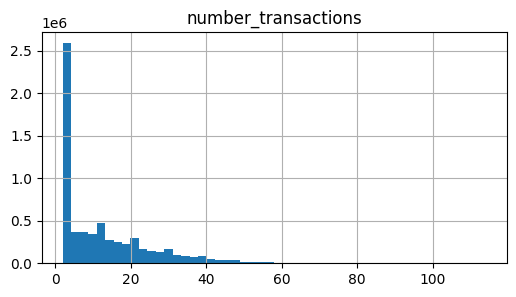

In [5]:
# Histograms of new features: log_amount, total_outgoing, total_incoming, number_transactions
import matplotlib.pyplot as plt

if 'log_amount' in features.columns:
    plt.figure(figsize=(6,3))
    features['log_amount'].hist(bins=50)
    plt.title('log_amount')
    plt.show()

for col in ['total_outgoing','total_incoming','number_transactions']:
    if col in features.columns:
        plt.figure(figsize=(6,3))
        features[col].hist(bins=50)
        plt.title(col)
        plt.show()
